In [344]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [345]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
import math

from utils import modeling 
from utils import analysis_pipeline

In [346]:
# sample1 = modeling.sample(0,1,2)
# sample2 = modeling.sample(1,1,2)
# print(sample1,sample2)

In [347]:
# decision1 = modeling.decision(sample1,0.5)
# decision2 = modeling.decision(sample2,0.5)
# print(decision1,decision2)

In [348]:
# print(modeling.accuracy([0,0],decision1))
# print(modeling.accuracy([1,1],decision2))

In [349]:
# ground_truth = [2,1]
# print(modeling.accuracy(ground_truth,modeling.decision(modeling.sample(0,1,2),0.4)))
# print(modeling.accuracy(ground_truth,modeling.decision(modeling.sample(0.5,1,2),0.4)))

In [350]:
set_sizes = np.random.randint(3,6,2000)
df = pd.DataFrame(set_sizes, columns=['set_size'])
df


,set_size
0,3
1,5
2,3
3,5
4,5
...,...
1995,3
1996,4
1997,3
1998,5


In [351]:
stimulus = []
for (row_index,row_data) in df.iterrows():
    stimulus.append(modeling.generate_stim(row_data['set_size']))

df['stim'] = stimulus

In [352]:
mean = []
for (row_index,row_data) in df.iterrows():
    mean.append(modeling.generate_mean_set(row_data['set_size']))

df['mean'] = mean

In [353]:
cue = []
for (row_index,row_data) in df.iterrows():
    cue.append(modeling.generate_cue(row_data['stim']))

df['cue'] = cue

In [354]:
sample = []
for (row_index,row_data) in df.iterrows():
    sample.append(modeling.generate_sample(row_data['mean'],0.4))

df['sample'] = sample

In [355]:
df

,set_size,stim,mean,cue,sample
0,3,"[0.39083821776583183, 0.8901981941154635, 0.91...",0.2500,1,0.602237
1,5,"[0.5011161893987938, 0.995611624507129, 0.5493...",0.0625,1,0.087698
2,3,"[0.7903910227812965, 0.8304047058008972, 0.486...",0.2500,1,0.706735
3,5,"[0.7665268757883177, 0.8820504425298649, 0.569...",0.0625,2,-0.002763
4,5,"[0.03375439478169684, 0.6927521904118167, 0.50...",0.0625,2,0.190784
...,...,...,...,...,...
1995,3,"[0.10361678219272574, 0.3900977444315312, 0.10...",0.2500,1,0.964181
1996,4,"[0.6415618249842877, 0.5448670766739229, 0.686...",0.1250,2,0.079978
1997,3,"[0.686106166238871, 0.8595181588478826, 0.5788...",0.2500,2,0.487657
1998,5,"[0.5363890144423765, 0.5397901588748513, 0.782...",0.0625,0,0.217535


In [356]:
decision = []
guessing = []
for (row_index,row_data) in df.iterrows():
    if row_data['sample'] < 0.1:
        guessing.append(1)
    else:
        guessing.append(0)
    decision.append(modeling.decision_random(row_data['stim'],row_data['sample'],row_data['cue'],0.1, 0.01))

df['decision'] = decision
df['guessing'] = guessing

<Axes: ylabel='Frequency'>

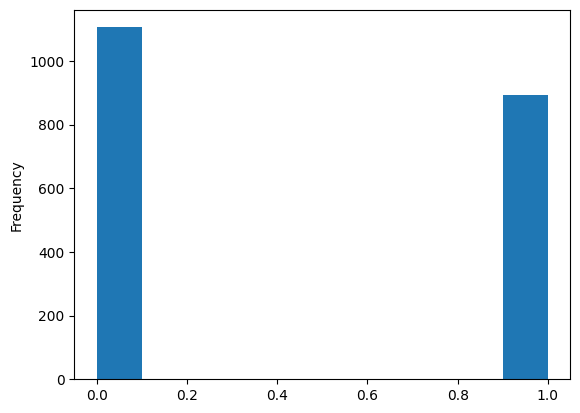

In [357]:
df['guessing'].plot(kind="hist")

In [358]:
df['decision_rad'] = analysis_pipeline.rad_convert(df['decision'])

In [359]:
normalized_decision = []

for (row_index,row_data) in df.iterrows():
    normalized_decision.append(modeling.normalize_decision(row_data['decision_rad']))

df['normalized_decision'] = normalized_decision

In [360]:
stim_rad = []

for (row_index,row_data) in df.iterrows():
    buffer = []
    for value in row_data['stim']:
        buffer.append(analysis_pipeline.rad_convert(value))
    stim_rad.append(buffer)

df['stim_rad'] =  stim_rad

In [361]:
choice = []
for (row_index,row_data) in df.iterrows():
    choice.append(modeling.find_stim_choice(row_data['stim_rad'],row_data['normalized_decision']))
    
df['choice'] = choice

In [362]:
accuracy = []
for (row_index,row_data) in df.iterrows():
    accuracy.append(modeling.generate_accuracy(row_data['cue'],row_data['choice']))
    
df['correct'] = accuracy

In [363]:
distances = []
for (row_index,row_data) in df.iterrows():
    buffer = []
    for value in row_data['stim_rad']:
        buffer.append(analysis_pipeline.find_angular_dist(value,row_data['normalized_decision']))

    distances.append(buffer)
    closest_choice = distances.index(min(distances))
    
df['distances'] = distances

# Plotting
Here I'm plotting

In [364]:
df.head(100)

,set_size,stim,mean,cue,sample,decision,guessing,decision_rad,normalized_decision,stim_rad,choice,correct,distances
0,3,"[0.39083821776583183, 0.8901981941154635, 0.91...",0.2500,1,0.602237,0.899812,0,5.653685,5.653685,"[2.45570894735053, 5.593280213744082, 5.741861...",1,1,"[-3.0852092375612754, 0.06040480322475883, -0...."
1,5,"[0.5011161893987938, 0.995611624507129, 0.5493...",0.0625,1,0.087698,0.650487,1,4.087131,4.087131,"[3.148605878420324, 6.255612330760393, 3.45167...",2,0,"[0.9385247006883297, -2.168481751651739, 0.635..."
2,3,"[0.7903910227812965, 0.8304047058008972, 0.486...",0.2500,1,0.706735,0.823657,0,5.175189,5.175189,"[4.966173261266087, 5.217586646500984, 3.05529...",1,1,"[0.20901553524445404, -0.042397849990442715, 2..."
3,5,"[0.7665268757883177, 0.8820504425298649, 0.569...",0.0625,2,-0.002763,0.561886,1,3.530437,3.530437,"[4.81623040351143, 5.542086380694899, 3.578197...",2,1,"[-1.2857935070014181, -2.0116494841848875, -0...."
4,5,"[0.03375439478169684, 0.6927521904118167, 0.50...",0.0625,2,0.190784,0.500605,0,3.145392,3.145392,"[0.21208511734509689, 4.352690384312002, 3.178...",2,1,"[2.933306688331628, -1.2072985786352768, -0.03..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,"[0.8162229959580845, 0.20716106408468782, 0.67...",0.0625,3,-0.396725,0.209356,1,1.315423,1.315423,"[5.128480335585939, 1.3016313540765991, 4.2468...",1,0,"[2.470128067158635, 0.013791741488388798, -2.9..."
96,5,"[0.09785519907465223, 0.7689154568773289, 0.60...",0.0625,4,-0.165783,0.266208,1,1.672637,1.672637,"[0.6148423490569883, 4.831238301114912, 3.7887...",0,0,"[1.057794984074287, 3.12458433919595, -2.11610..."
97,4,"[0.021909790945506824, 0.15699695432698768, 0....",0.1250,0,-0.209794,0.493554,1,3.101092,3.101092,"[0.1376632765521848, 0.9864409566992736, 0.005...",3,0,"[2.9634291748555306, 2.1146514947084416, 3.095..."
98,4,"[0.791406790185578, 0.11480153822809225, 0.815...",0.1250,3,-0.170642,0.591298,1,3.715233,3.715233,"[4.972555516096182, 0.7213193382363648, 5.1239...",0,0,"[-1.2573223282935384, 2.9939138495662783, -1.4..."


<Axes: title={'center': 'Set Size Effect on Accuracy'}, xlabel='Set Size', ylabel='Accuracy'>

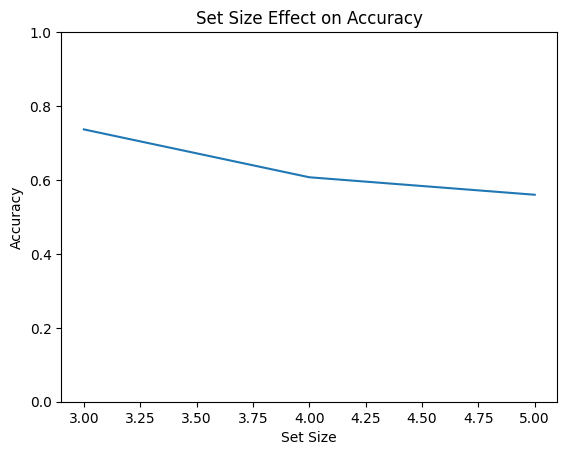

In [365]:
df.groupby('set_size').correct.mean().plot(xlabel= 'Set Size', ylabel= 'Accuracy', title='Set Size Effect on Accuracy', ylim=[0,1])

In [366]:
ang_dist = []
for (row_index,row_data) in df.iterrows():
    ang_dist.append(analysis_pipeline.find_angular_dist(row_data['stim_rad'][row_data['cue']],row_data['decision_rad']))
    
df['precision_difference_0'] = ang_dist

In [367]:
df

,set_size,stim,mean,cue,sample,decision,guessing,decision_rad,normalized_decision,stim_rad,choice,correct,distances,precision_difference_0
0,3,"[0.39083821776583183, 0.8901981941154635, 0.91...",0.2500,1,0.602237,0.899812,0,5.653685,5.653685,"[2.45570894735053, 5.593280213744082, 5.741861...",1,1,"[-3.0852092375612754, 0.06040480322475883, -0....",0.060405
1,5,"[0.5011161893987938, 0.995611624507129, 0.5493...",0.0625,1,0.087698,0.650487,1,4.087131,4.087131,"[3.148605878420324, 6.255612330760393, 3.45167...",2,0,"[0.9385247006883297, -2.168481751651739, 0.635...",-2.168482
2,3,"[0.7903910227812965, 0.8304047058008972, 0.486...",0.2500,1,0.706735,0.823657,0,5.175189,5.175189,"[4.966173261266087, 5.217586646500984, 3.05529...",1,1,"[0.20901553524445404, -0.042397849990442715, 2...",-0.042398
3,5,"[0.7665268757883177, 0.8820504425298649, 0.569...",0.0625,2,-0.002763,0.561886,1,3.530437,3.530437,"[4.81623040351143, 5.542086380694899, 3.578197...",2,1,"[-1.2857935070014181, -2.0116494841848875, -0....",-0.047760
4,5,"[0.03375439478169684, 0.6927521904118167, 0.50...",0.0625,2,0.190784,0.500605,0,3.145392,3.145392,"[0.21208511734509689, 4.352690384312002, 3.178...",2,1,"[2.933306688331628, -1.2072985786352768, -0.03...",-0.032753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3,"[0.10361678219272574, 0.3900977444315312, 0.10...",0.2500,1,0.964181,0.379324,0,2.383363,2.383363,"[0.6510434434505618, 2.4510564161760944, 0.690...",1,1,"[1.732319476198462, -0.0676934965270708, 1.692...",-0.067693
1996,4,"[0.6415618249842877, 0.5448670766739229, 0.686...",0.1250,2,0.079978,0.884552,1,5.557806,5.557806,"[4.031051832388598, 3.4235008105234854, 4.3105...",2,1,"[1.5267541484639073, 2.1343051703290197, 1.247...",1.247214
1997,3,"[0.686106166238871, 0.8595181588478826, 0.5788...",0.2500,2,0.487657,0.594970,0,3.738310,3.738310,"[4.310932182877389, 5.400511866927066, 3.63696...",2,1,"[-0.5726224091236656, -1.6622020931733426, 0.1...",0.101345
1998,5,"[0.5363890144423765, 0.5397901588748513, 0.782...",0.0625,0,0.217535,0.528223,0,3.318920,3.318920,"[3.370231574476879, 3.3916015952026, 4.9177238...",0,1,"[-0.05131147806874026, -0.07268149879446151, -...",-0.051311


<Axes: title={'center': 'Set Size Effect on Precision'}, xlabel='Set Size', ylabel='Angular Distance from Target (rad)'>

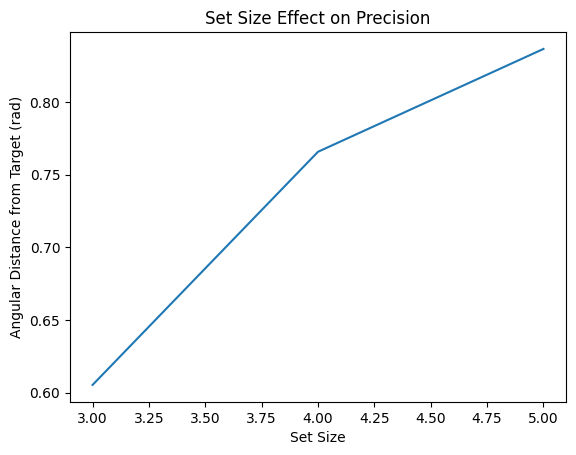

In [368]:
df['precision_difference_0_abs'] = df['precision_difference_0'].abs()

df.groupby('set_size').precision_difference_0_abs.mean().plot(xlabel= 'Set Size', ylabel= 'Angular Distance from Target (rad)', title='Set Size Effect on Precision')

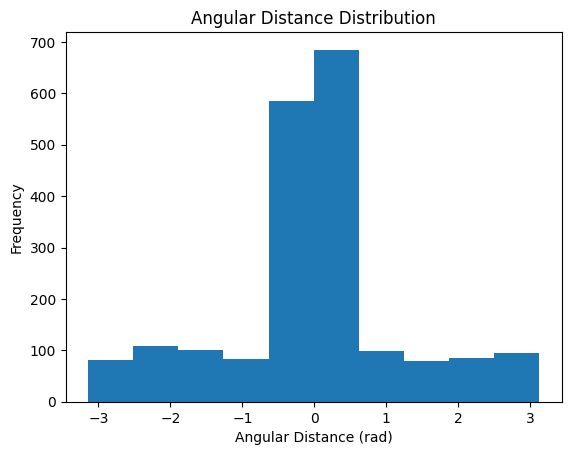

In [369]:
analysis_pipeline.plot_hist('precision_difference_0',df,'Angular Distance (rad)','Angular Distance Distribution')

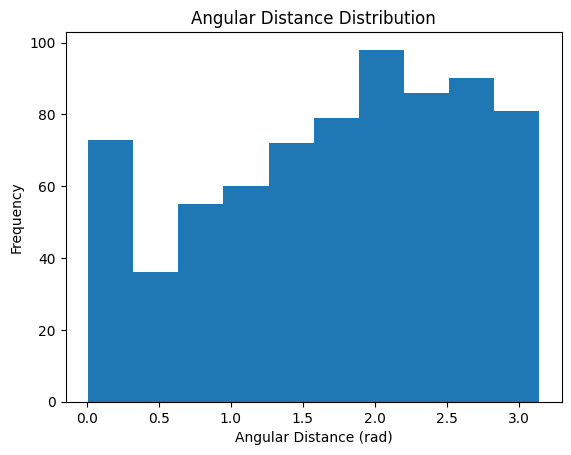

In [370]:
incorrect_df = df[df['correct'] == 0]
analysis_pipeline.plot_hist('precision_difference_0_abs',incorrect_df,'Angular Distance (rad)','Angular Distance Distribution')

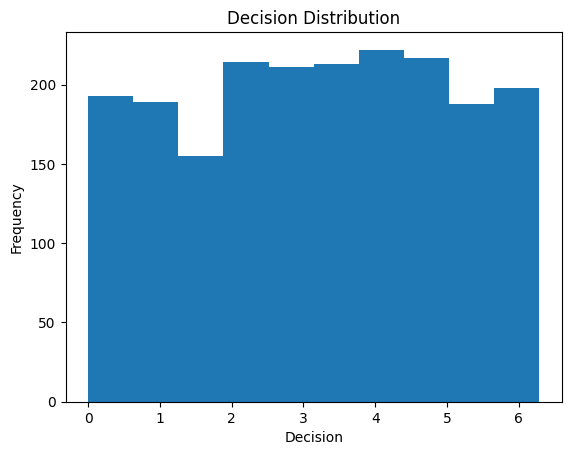

In [371]:
analysis_pipeline.plot_hist('normalized_decision',df,'Decision','Decision Distribution')

In [372]:
choice = []
for (row_index,row_data) in df.iterrows():
    if math.isnan(row_data['choice']) == True:
        choice.append(row_data['choice'])
    else:
        choice.append(int(row_data['choice']))

df['choice'] = choice
print(choice)

[1, 2, 1, 2, 2, 1, 2, 2, 3, 3, 3, 0, 0, 0, 2, 0, 1, 2, 1, 3, 4, 1, 0, 1, 1, 1, 3, 2, 2, 0, 1, 0, 3, 2, 1, 3, 3, 2, 1, 0, 1, 3, 2, 0, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 4, 1, 2, 1, 1, 1, 2, 1, 0, 4, 3, 2, 0, 3, 2, 1, 0, 4, 2, 3, 2, 4, 3, 0, 4, 0, 1, 4, 1, 1, 0, 0, 0, 1, 1, 3, 2, 2, 0, 2, 1, 0, 3, 0, 3, 1, 0, 0, 1, 2, 2, 4, 0, 3, 2, 3, 1, 0, 0, 4, 1, 2, 2, 0, 1, 3, 3, 2, 0, 1, 0, 3, 2, 0, 0, 0, 1, 1, 1, 0, 1, 3, 3, 3, 0, 4, 1, 0, 2, 2, 2, 2, 2, 4, 0, 3, 1, 4, 2, 3, 2, 1, 2, 3, 3, 4, 0, 3, 0, 2, 0, 4, 3, 4, 3, 0, 2, 0, 0, 0, 1, 3, 1, 3, 3, 3, 2, 2, 1, 1, 2, 2, 1, 3, 1, 2, 0, 0, 3, 0, 1, 3, 3, 2, 0, 4, 3, 3, 1, 0, 2, 0, 0, 3, 1, 1, 2, 4, 3, 1, 2, 0, 0, 4, 3, 3, 1, 0, 3, 0, 2, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 3, 3, 1, 2, 2, 2, 1, 0, 4, 1, 3, 3, 2, 4, 2, 1, 2, 1, 2, 3, 2, 4, 2, 3, 4, 3, 1, 3, 0, 1, 0, 1, 2, 0, 3, 2, 1, 1, 4, 2, 2, 1, 4, 3, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 2, 1, 4, 0, 0, 1, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 0, 2, 0, 3, 0, 0, 0, 3, 3, 0, 0, 2, 2, 1, 

In [373]:
# ang_dist = []
# for (row_index,row_data) in df.iterrows():
#     if math.isnan(row_data['choice']):
#         ang_dist.append(None)
#     else:
#         ang_dist.append(analysis_pipeline.find_angular_dist(row_data['stim_rad'][row_data['choice']],row_data['decision_rad']))
# df['precision_difference_choice'] = ang_dist

# Set Size Random Model Plotting

In [374]:
df_new = modeling.set_create_df(3000,0.4)

In [375]:
df_new

,set_size,stim,mean,cue,sample
0,5,"[0.07803660933190582, 0.16021362800166772, 0.5...",0.0625,0,0.227853
1,3,"[0.8298966905357991, 0.542963959412399, 0.6091...",0.2500,2,0.534321
2,3,"[0.23591033369720105, 0.5240295668334846, 0.26...",0.2500,2,0.084312
3,4,"[0.16005233377448502, 0.343136575439588, 0.048...",0.1250,1,0.127066
4,4,"[0.07972270837871465, 0.134006393192991, 0.110...",0.1250,2,0.014393
...,...,...,...,...,...
2995,5,"[0.3779184586022931, 0.40579487441899675, 0.73...",0.0625,2,0.491699
2996,3,"[0.7944351788351771, 0.7651919084592169, 0.805...",0.2500,2,0.008915
2997,4,"[0.7113027239671003, 0.41692911471374416, 0.72...",0.1250,2,0.710729
2998,3,"[0.12668885006424668, 0.969209374844248, 0.086...",0.2500,1,0.191987


In [376]:
df_random = modeling.run_model_random(df_new,0.1,0.01)

In [377]:
df_random = modeling.model_analysis(df_random)

<Axes: title={'center': 'Set Size Effect on Accuracy'}, xlabel='Set Size', ylabel='Accuracy'>

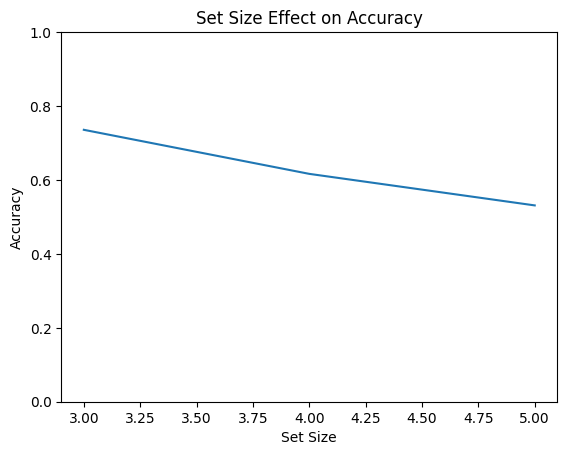

In [378]:
df_random.groupby('set_size').correct.mean().plot(xlabel= 'Set Size', ylabel= 'Accuracy', title='Set Size Effect on Accuracy', ylim=[0,1])

<Axes: title={'center': 'Set Size Effect on Error'}, xlabel='Set Size', ylabel='Angular Distance from Target (rad)'>

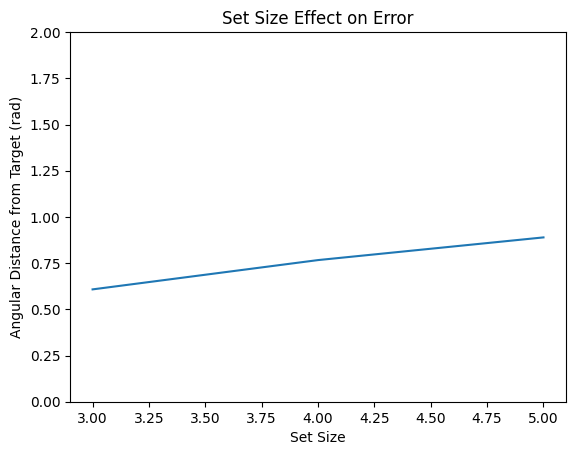

In [379]:
df_random.groupby('set_size').precision_difference_0_abs.mean().plot(xlabel= 'Set Size', ylabel= 'Angular Distance from Target (rad)', title='Set Size Effect on Error',ylim=[0,2])

<Axes: title={'center': 'Set Size Effect on Precision for Incorrect Choice'}, xlabel='Set Size', ylabel='Angular Distance from Incorrect Choice (rad)'>

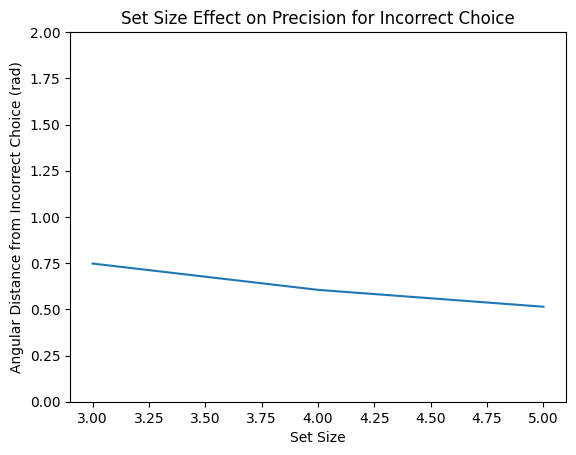

In [380]:
incorrect_df_random = df_random[df_random['correct'] == 0]
incorrect_df_random.groupby('set_size').precision_difference_choice_abs.mean().plot(xlabel= 'Set Size', ylabel= 'Angular Distance from Incorrect Choice (rad)', title='Set Size Effect on Precision for Incorrect Choice',ylim=[0,2])

In [381]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import get_trial_dataframe
from utils import get_trial_paths
from utils import analysis_pipeline

# Set Size Confused Model Plotting

In [382]:
df_confused = modeling.run_model_confused(df_new,0.8,0.01)

In [383]:
df_confused = modeling.model_analysis(df_confused)

<Axes: title={'center': 'Set Size Effect on Accuracy'}, xlabel='Set Size', ylabel='Accuracy'>

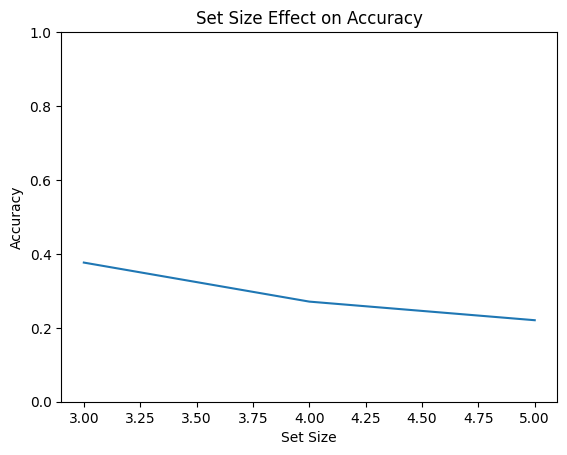

In [384]:
df_confused.groupby('set_size').correct.mean().plot(xlabel= 'Set Size', ylabel= 'Accuracy', title='Set Size Effect on Accuracy', ylim=[0,1])

<Axes: title={'center': 'Set Size Effect on Precision'}, xlabel='Set Size', ylabel='Angular Distance from Target (rad)'>

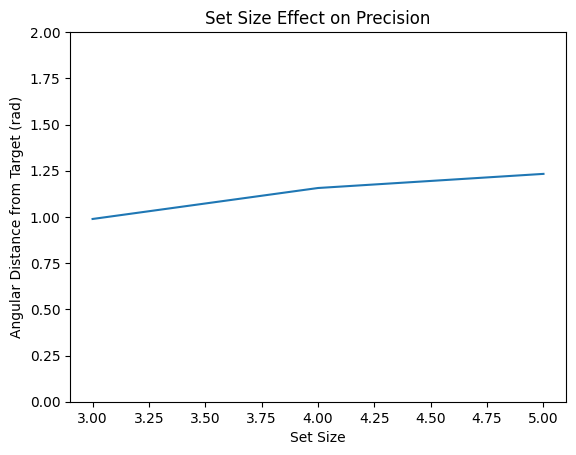

In [385]:
df_confused.groupby('set_size').precision_difference_0_abs.mean().plot(xlabel= 'Set Size', ylabel= 'Angular Distance from Target (rad)', title='Set Size Effect on Precision',ylim=[0,2])

<Axes: title={'center': 'Set Size Effect on Precision for Incorrect Choice'}, xlabel='Set Size', ylabel='Angular Distance from Incorrect Choice (rad)'>

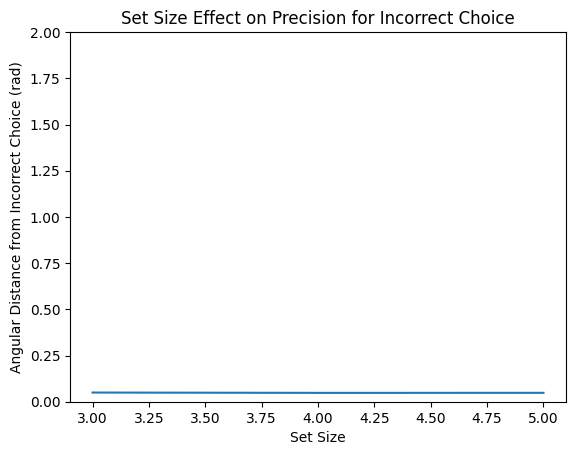

In [386]:
incorrect_df_confused = df_confused[df_confused['correct'] == 0]
incorrect_df_confused.groupby('set_size').precision_difference_choice_abs.mean().plot(xlabel= 'Set Size', ylabel= 'Angular Distance from Incorrect Choice (rad)', title='Set Size Effect on Precision for Incorrect Choice',ylim=[0,2])

# Set Size Summary

Text(0.5, 1.0, 'Set Size Effect on Accuracy')

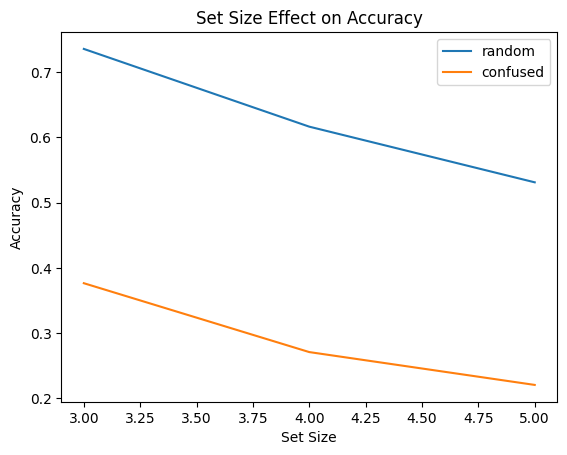

In [387]:
fig,ax = plt.subplots()
ax.plot(df_random.groupby('set_size').correct.mean(), label= 'random')
ax.plot(df_confused.groupby('set_size').correct.mean(),label= 'confused')
plt.legend()
plt.xlabel('Set Size')
plt.ylabel('Accuracy')
plt.title('Set Size Effect on Accuracy')

Text(0.5, 1.0, 'Set Size Effect on Error')

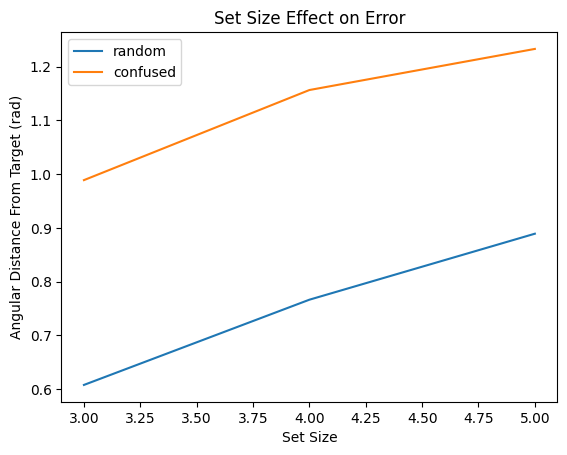

In [388]:
fig,ax = plt.subplots()
ax.plot(df_random.groupby('set_size').precision_difference_0_abs.mean(), label= 'random')
ax.plot(df_confused.groupby('set_size').precision_difference_0_abs.mean(),label= 'confused')
plt.legend()
plt.xlabel('Set Size')
plt.ylabel('Angular Distance From Target (rad)')
plt.title('Set Size Effect on Error')

Text(0.5, 1.0, 'Difference in Angular Error from Incorrect Choice (Incorrect Trials)')

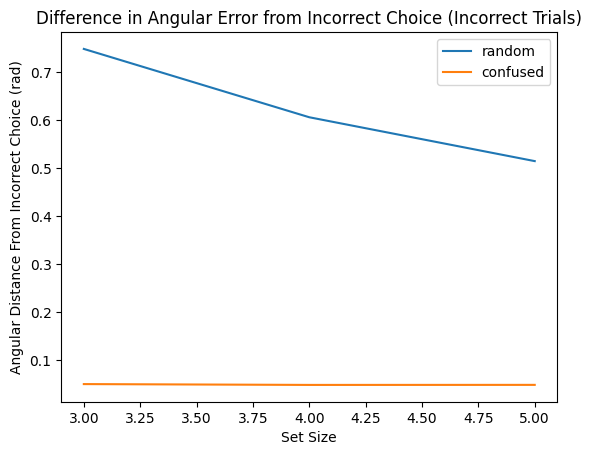

In [389]:
fig,ax = plt.subplots()
ax.plot(incorrect_df_random.groupby('set_size').precision_difference_choice_abs.mean(), label= 'random')
ax.plot(incorrect_df_confused.groupby('set_size').precision_difference_choice_abs.mean(),label= 'confused')
plt.legend()
plt.xlabel('Set Size')
plt.ylabel('Angular Distance From Incorrect Choice (rad)')
plt.title('Difference in Angular Error from Incorrect Choice (Incorrect Trials)')

In [390]:
correct_df_confused = df_confused[df_confused['correct'] == 1]
correct_df_random = df_random[df_random['correct'] == 1]

Text(0.5, 1.0, 'Difference in Guessing Models (Correct Trials)')

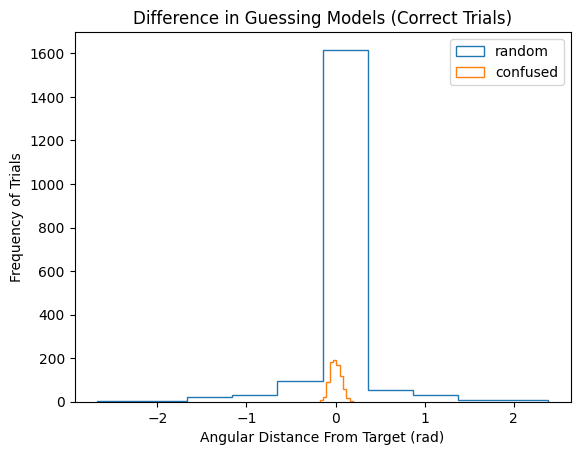

In [391]:
fig,ax = plt.subplots()
ax.hist(correct_df_random.precision_difference_0, label= 'random', histtype = 'step')
ax.hist(correct_df_confused.precision_difference_0,label= 'confused', histtype = 'step')
plt.legend()
plt.xlabel('Angular Distance From Target (rad)')
plt.ylabel('Frequency of Trials')
plt.title('Difference in Guessing Models (Correct Trials)')

Text(0.5, 1.0, 'Difference in Angular Error from Target (Incorrect Trials)')

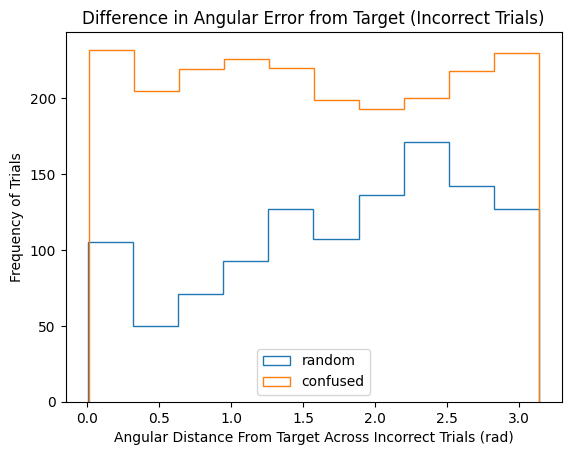

In [392]:
fig,ax = plt.subplots()
ax.hist(incorrect_df_random.precision_difference_0_abs, label= 'random', histtype = 'step')
ax.hist(incorrect_df_confused.precision_difference_0_abs,label= 'confused', histtype = 'step')
plt.legend()
plt.xlabel('Angular Distance From Target Across Incorrect Trials (rad)')
plt.ylabel('Frequency of Trials')
plt.title('Difference in Angular Error from Target (Incorrect Trials)')

Text(0.5, 1.0, 'Difference in Angular Error from Choice (All Trials)')

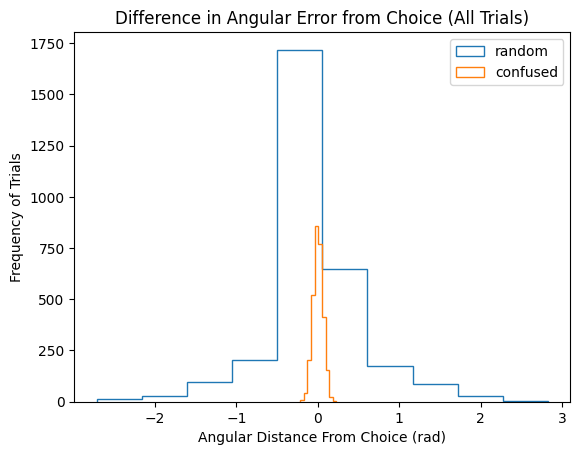

In [393]:
fig,ax = plt.subplots()
ax.hist(df_random.precision_difference_choice, label= 'random', histtype = 'step')
ax.hist(df_confused.precision_difference_choice,label= 'confused', histtype = 'step')
plt.legend()
plt.xlabel('Angular Distance From Choice (rad)')
plt.ylabel('Frequency of Trials')
plt.title('Difference in Angular Error from Choice (All Trials)')

Text(0.5, 1.0, 'Difference in Angular Error from Choice (Incorrect Trials)')

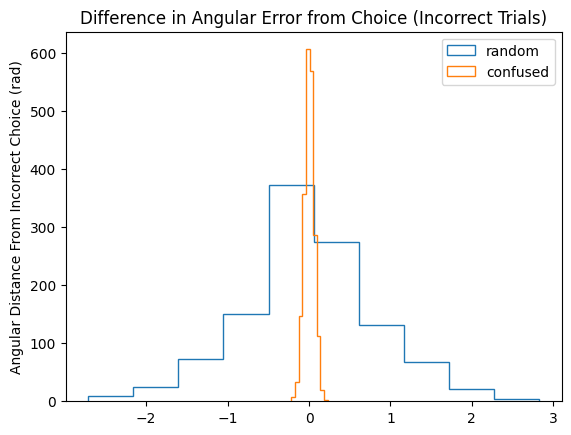

In [394]:
fig,ax = plt.subplots()
ax.hist(incorrect_df_random.precision_difference_choice, label= 'random', histtype = 'step')
ax.hist(incorrect_df_confused.precision_difference_choice,label= 'confused', histtype = 'step')
plt.legend()
plt.ylabel('Angular Distance From Incorrect Choice (rad)')
plt.title('Difference in Angular Error from Choice (Incorrect Trials)')

# Delay Interval Random Model Plotting

In [395]:
df_delay = modeling.delay_create_df(1000,0.4)

In [396]:
df_delay_random = modeling.run_model_random(df_delay,0.1,0.01)

In [397]:
df_delay_random = modeling.model_analysis(df_delay_random)

<Axes: title={'center': 'Delay Time Effect on Accuracy'}, xlabel='Delay Time (s)', ylabel='Accuracy'>

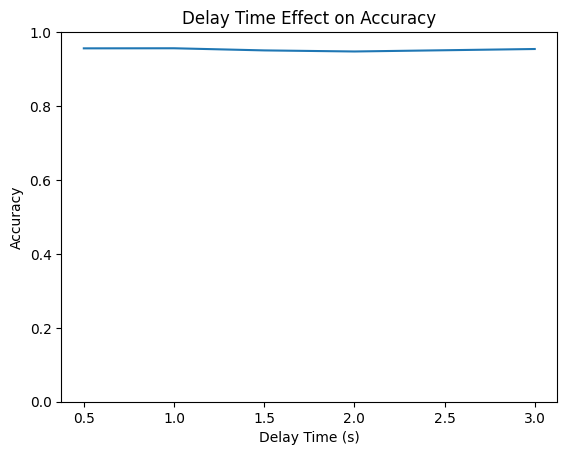

In [398]:
df_delay_random.groupby('delay_s').correct.mean().plot(xlabel= 'Delay Time (s)', ylabel= 'Accuracy', title='Delay Time Effect on Accuracy', ylim=[0,1])

<Axes: title={'center': 'Delay Time Effect on Precision'}, xlabel='Delay Time (s)', ylabel='Angular Distance from Target abe(rad)'>

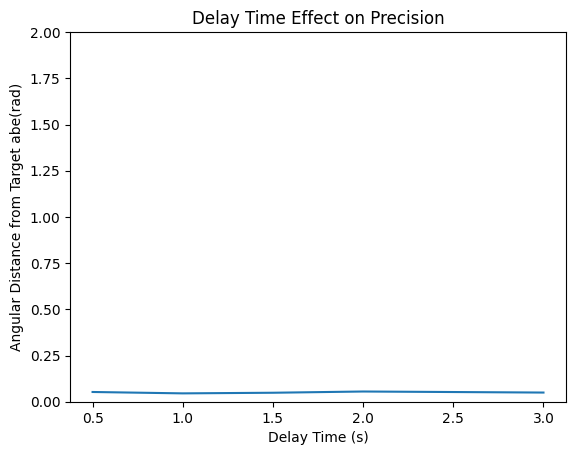

In [399]:
df_delay_random.groupby('delay_s').precision_difference_0_abs.mean().plot(xlabel= 'Delay Time (s)', ylabel= 'Angular Distance from Target abe(rad)', title='Delay Time Effect on Precision',ylim=[0,2])

<Axes: title={'center': 'Delay Time Effect on Precision for Incorrect Choice'}, xlabel='Delay Time (s)', ylabel='Angular Distance from Incorrect Choice (rad)'>

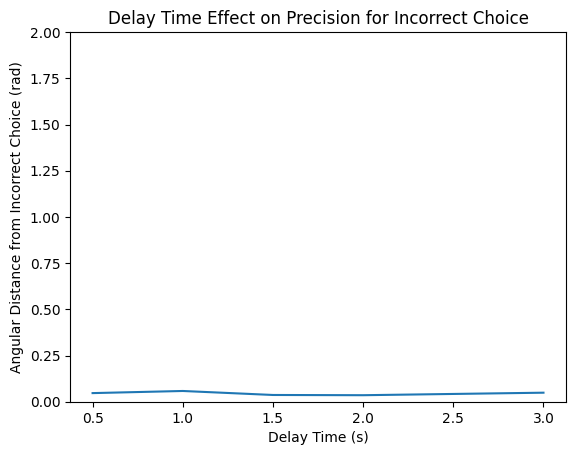

In [400]:
incorrect_df_delay_random = df_delay_random[df_delay_random['correct'] == 0]
incorrect_df_delay_random.groupby('delay_s').precision_difference_choice_abs.mean().plot(xlabel= 'Delay Time (s)', ylabel= 'Angular Distance from Incorrect Choice (rad)', title='Delay Time Effect on Precision for Incorrect Choice',ylim=[0,2])

# Delay Interval Confused Model Plotting

In [401]:
df_delay_confused = modeling.run_model_confused(df_delay,0.1,0.01)

In [402]:
df_delay_confused = modeling.model_analysis(df_delay_confused)

<Axes: title={'center': 'Delay Time Effect on Accuracy'}, xlabel='Delay Time (s)', ylabel='Accuracy'>

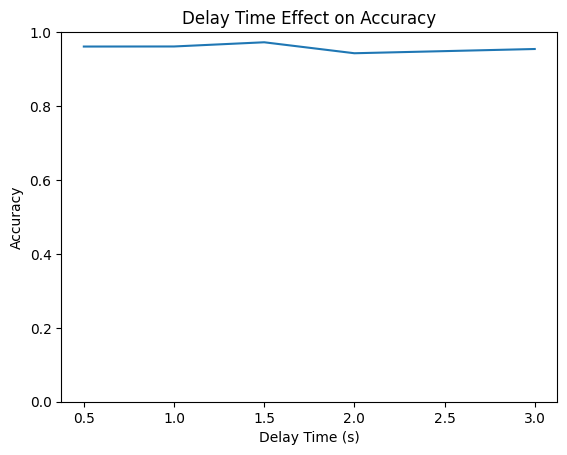

In [403]:
df_delay_confused.groupby('delay_s').correct.mean().plot(xlabel= 'Delay Time (s)', ylabel= 'Accuracy', title='Delay Time Effect on Accuracy', ylim=[0,1])

<Axes: title={'center': 'Delay Time Effect on Precision'}, xlabel='Delay Time (s)', ylabel='Angular Distance from Target abe(rad)'>

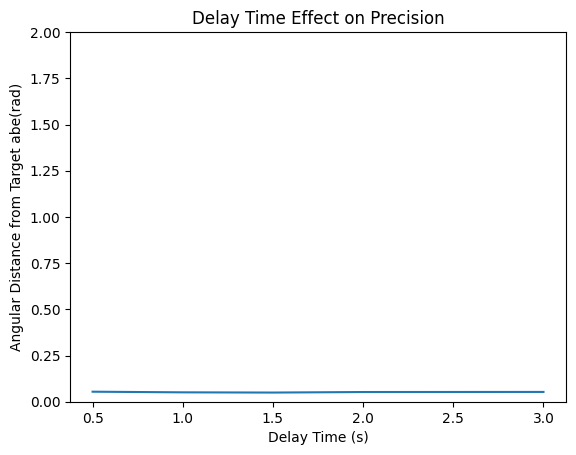

In [404]:
df_delay_confused.groupby('delay_s').precision_difference_0_abs.mean().plot(xlabel= 'Delay Time (s)', ylabel= 'Angular Distance from Target abe(rad)', title='Delay Time Effect on Precision',ylim=[0,2])

<Axes: title={'center': 'Delay Time Effect on Precision for Incorrect Choice'}, xlabel='Delay Time (s)', ylabel='Angular Distance from Incorrect Choice (rad)'>

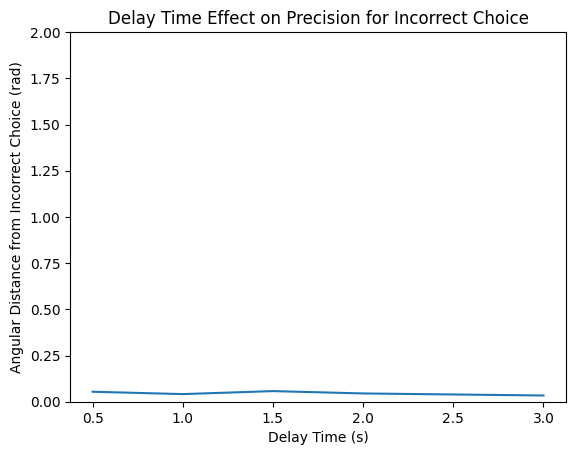

In [405]:
incorrect_df_delay_confused = df_delay_confused[df_delay_confused['correct'] == 0]
incorrect_df_delay_confused.groupby('delay_s').precision_difference_choice_abs.mean().plot(xlabel= 'Delay Time (s)', ylabel= 'Angular Distance from Incorrect Choice (rad)', title='Delay Time Effect on Precision for Incorrect Choice',ylim=[0,2])

# 

Text(0.5, 1.0, 'Delay Time Effect on Accuracy')

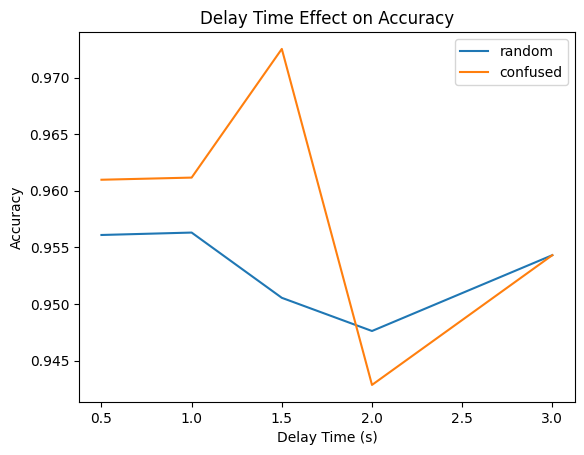

In [406]:
fig,ax = plt.subplots()
ax.plot(df_delay_random.groupby('delay_s').correct.mean(), label= 'random')
ax.plot(df_delay_confused.groupby('delay_s').correct.mean(),label= 'confused')
plt.legend()
plt.xlabel('Delay Time (s)')
plt.ylabel('Accuracy')
plt.title('Delay Time Effect on Accuracy')

Text(0.5, 1.0, 'Delay Time Effect on Error')

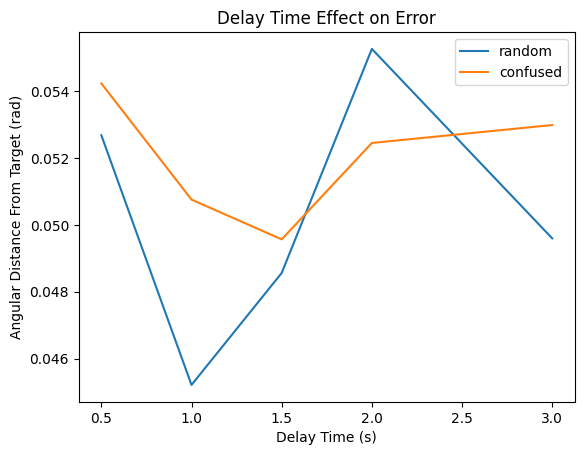

In [407]:
fig,ax = plt.subplots()
ax.plot(df_delay_random.groupby('delay_s').precision_difference_0_abs.mean(), label= 'random')
ax.plot(df_delay_confused.groupby('delay_s').precision_difference_0_abs.mean(),label= 'confused')
plt.legend()
plt.xlabel('Delay Time (s)')
plt.ylabel('Angular Distance From Target (rad)')
plt.title('Delay Time Effect on Error')

Text(0.5, 1.0, 'Difference in Guessing Models')

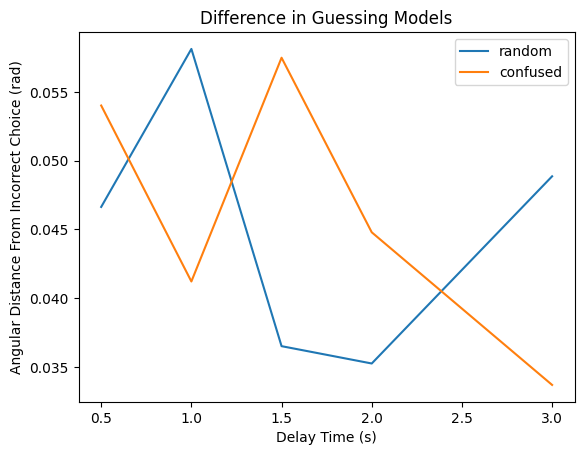

In [408]:
fig,ax = plt.subplots()
ax.plot(incorrect_df_delay_random.groupby('delay_s').precision_difference_choice_abs.mean(), label= 'random')
ax.plot(incorrect_df_delay_confused.groupby('delay_s').precision_difference_choice_abs.mean(),label= 'confused')
plt.legend()
plt.xlabel('Delay Time (s)')
plt.ylabel('Angular Distance From Incorrect Choice (rad)')
plt.title('Difference in Guessing Models')

Text(0.5, 1.0, 'Difference in Angular Error from Target (All Trials)')

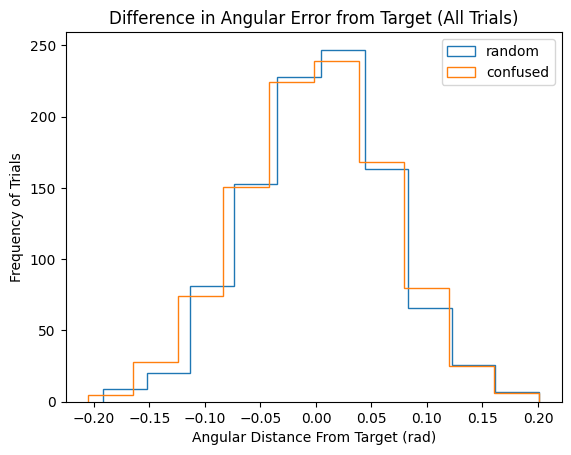

In [409]:
fig,ax = plt.subplots()
ax.hist(df_delay_random.precision_difference_0, label= 'random', histtype = 'step')
ax.hist(df_delay_confused.precision_difference_0,label= 'confused', histtype = 'step')
plt.legend()
plt.xlabel('Angular Distance From Target (rad)')
plt.ylabel('Frequency of Trials')
plt.title('Difference in Angular Error from Target (All Trials)')

Text(0.5, 1.0, 'Difference in Angular Error from Choice (All Trials)')

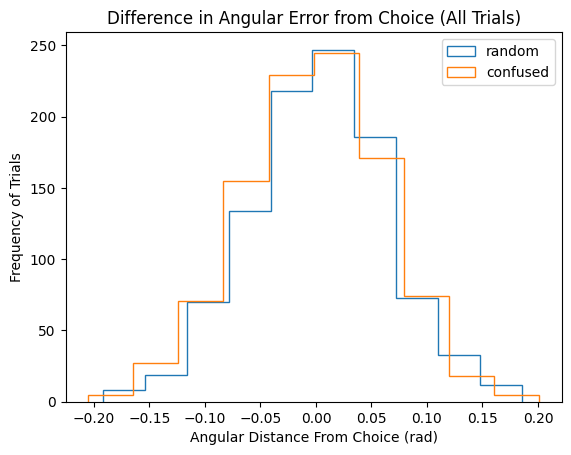

In [410]:
fig,ax = plt.subplots()
ax.hist(df_delay_random.precision_difference_choice, label= 'random', histtype = 'step')
ax.hist(df_delay_confused.precision_difference_choice,label= 'confused', histtype = 'step')
plt.legend()
plt.xlabel('Angular Distance From Choice (rad)')
plt.ylabel('Frequency of Trials')
plt.title('Difference in Angular Error from Choice (All Trials)')

Text(0.5, 1.0, 'Difference in Guessing Models')

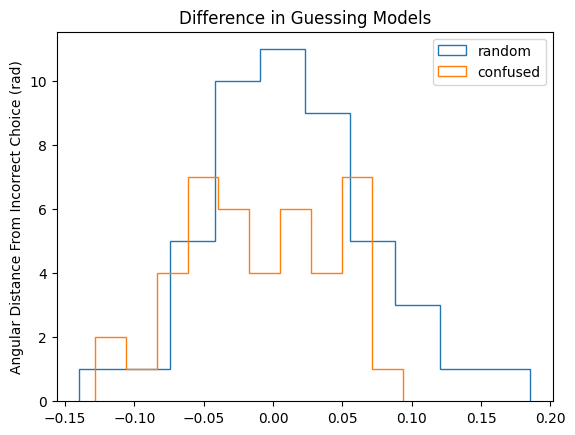

In [411]:
fig,ax = plt.subplots()
ax.hist(incorrect_df_delay_random.precision_difference_choice, label= 'random', histtype = 'step')
ax.hist(incorrect_df_delay_confused.precision_difference_choice,label= 'confused', histtype = 'step')
plt.legend()
plt.ylabel('Angular Distance From Incorrect Choice (rad)')
plt.title('Difference in Guessing Models')